In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

Data Precipitation Preparation

In [30]:
# Total tp preparation
# Load CSV
df_csv = pd.read_csv('/Users/Jia/Downloads/data_skripsi/curah_hujan/tp_arrange.csv')

In [31]:
# Mengonversi kolom 'time' ke tipe data datetime
df_csv['time'] = pd.to_datetime(df_csv['time'])

# Menambahkan kolom 'month'
df_csv['month'] = df_csv['time'].dt.month

# Menambahkan kolom 'year'
df_csv['year'] = df_csv['time'].dt.year

# Melakukan group by bulan, longitude, dan latitude, dan menghitung rata-rata tp
tp_mean_monthly = df_csv.groupby(['month', 'year', 'longitude', 'latitude'], as_index=False)['tp'].mean()

Optional

Menyimpan hasil ke file CSV #

df_csv.to_csv('/Users/Jia/Downloads/data_skripsi/curah_hujan/tp_mean_month.csv', index=False)

Spatial Join df and gdf

In [32]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/Jia/Downloads/data_skripsi/kota_DKIJakarta/Kota_DKIJakarta.shp")

In [33]:
# Convert DataFrame to GeoDataFrame
geometry = gpd.points_from_xy(df_csv['longitude'], df_csv['latitude'])
gdf_csv = gpd.GeoDataFrame(df_csv, geometry=geometry, crs="EPSG:4326")

<Axes: >

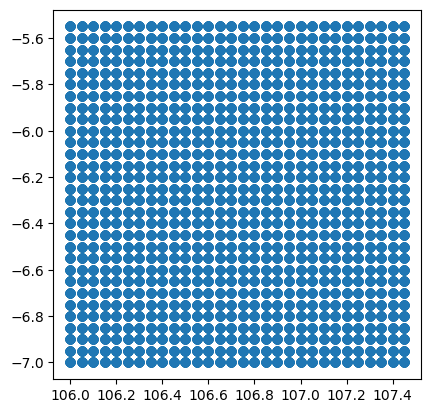

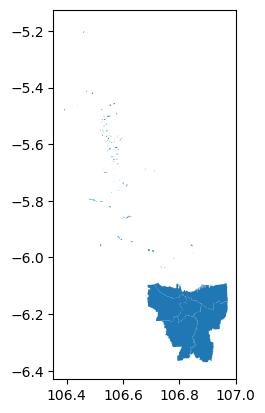

In [34]:
gdf_csv.plot()
gdf_shapefile.plot()

In [35]:
# spatial join
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')
result_pop = result[['longitude', 'latitude', 'tp', 'month', 'year', 'KABKOT', 'geometry', 'time']]

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1440 entries, 406 to 53659
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  1440 non-null   float64       
 1   latitude   1440 non-null   float64       
 2   tp         1440 non-null   float64       
 3   month      1440 non-null   int32         
 4   year       1440 non-null   int32         
 5   KABKOT     1440 non-null   object        
 6   geometry   1440 non-null   geometry      
 7   time       1440 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(2), object(1)
memory usage: 90.0+ KB


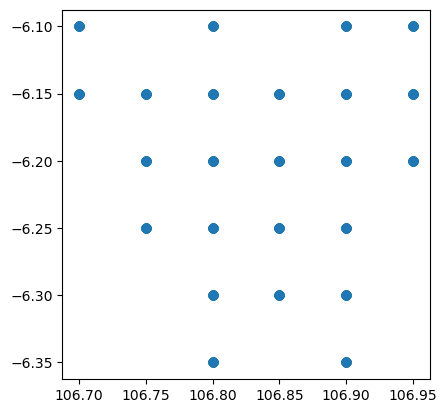

In [36]:
result_pop.plot()
result_pop.info()

In [37]:
result_pop

,longitude,latitude,tp,month,year,KABKOT,geometry,time
406,106.80,-6.35,8.222184,1,2018,JAKARTA SELATAN,POINT (106.80000 -6.35000),2018-01-01
436,106.80,-6.30,7.843826,1,2018,JAKARTA SELATAN,POINT (106.80000 -6.30000),2018-01-01
437,106.85,-6.30,7.883238,1,2018,JAKARTA SELATAN,POINT (106.85000 -6.30000),2018-01-01
465,106.75,-6.25,7.415669,1,2018,JAKARTA SELATAN,POINT (106.75000 -6.25000),2018-01-01
466,106.80,-6.25,7.465468,1,2018,JAKARTA SELATAN,POINT (106.80000 -6.25000),2018-01-01
...,...,...,...,...,...,...,...,...
53628,106.90,-6.15,8.131620,12,2022,JAKARTA UTARA,POINT (106.90000 -6.15000),2022-12-01
53629,106.95,-6.15,8.344428,12,2022,JAKARTA UTARA,POINT (106.95000 -6.15000),2022-12-01
53656,106.80,-6.10,7.512688,12,2022,JAKARTA UTARA,POINT (106.80000 -6.10000),2022-12-01
53658,106.90,-6.10,7.869198,12,2022,JAKARTA UTARA,POINT (106.90000 -6.10000),2022-12-01


Dissolved Result

In [38]:
# Dissolve berdasarkan 'KABKOT' dan 'month' dengan fungsi agregasi mean
dissolved_result = result_pop.dissolve(by=['KABKOT', 'month', 'year'], aggfunc='mean')

# Reset indeks untuk membuat kolom 'KABKOT' 'month', dan 'year' menjadi kolom
dissolved_result.reset_index(inplace=True)

In [39]:
dissolved_result

,KABKOT,month,year,geometry,longitude,latitude,tp,time
0,JAKARTA BARAT,1,2018,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.750000,-6.158333,7.256567,2018-01-01
1,JAKARTA BARAT,1,2019,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.750000,-6.158333,7.881096,2019-01-01
2,JAKARTA BARAT,1,2020,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.750000,-6.158333,14.475730,2020-01-01
3,JAKARTA BARAT,1,2021,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.750000,-6.158333,10.499982,2021-01-01
4,JAKARTA BARAT,1,2022,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.750000,-6.158333,6.211204,2022-01-01
...,...,...,...,...,...,...,...,...
295,JAKARTA UTARA,12,2018,"MULTIPOINT ((106.80000 -6.10000), (106.85000 -...",106.891667,-6.125000,5.350711,2018-12-01
296,JAKARTA UTARA,12,2019,"MULTIPOINT ((106.80000 -6.10000), (106.85000 -...",106.891667,-6.125000,10.058320,2019-12-01
297,JAKARTA UTARA,12,2020,"MULTIPOINT ((106.80000 -6.10000), (106.85000 -...",106.891667,-6.125000,9.142884,2020-12-01
298,JAKARTA UTARA,12,2021,"MULTIPOINT ((106.80000 -6.10000), (106.85000 -...",106.891667,-6.125000,8.356443,2021-12-01


In [40]:
# Tampilkan hasil
dissolved_result.head()

,KABKOT,month,year,geometry,longitude,latitude,tp,time
0,JAKARTA BARAT,1,2018,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,7.256567,2018-01-01
1,JAKARTA BARAT,1,2019,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,7.881096,2019-01-01
2,JAKARTA BARAT,1,2020,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,14.475730,2020-01-01
3,JAKARTA BARAT,1,2021,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,10.499982,2021-01-01
4,JAKARTA BARAT,1,2022,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,6.211204,2022-01-01


In [41]:
dissolved_result_df = pd.DataFrame(dissolved_result)
dissolved_result_df = dissolved_result_df.drop(['geometry'], axis=1) #kolom geometry di hapus

In [42]:
#untuk mengurutkan file berdasarkan
dissolved_result_df = dissolved_result_df.sort_values(by=[ 'year', 'KABKOT', 'month'])

In [43]:
dissolved_result_df.to_csv("/Users/Jia/Downloads/data_skripsi/curah_hujan/dissolved_result_tp.csv") 

#di save ke csv, jadi data rata" bulanan

In [44]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')
polygon_result.rename(columns= {'KABKOT_left':'KABKOT', 'index_right':'index'}, inplace=True)
polygon_result.drop(columns={'KABKOT_right'}, inplace=True)

In [45]:
print(polygon_result.columns)

Index(['PROVNO', 'KABKOTNO', 'PROVINSI', 'KABKOT', 'geometry', 'index',
       'month', 'year', 'longitude', 'latitude', 'tp', 'time'],
      dtype='object')


Grafik Timetrend Series

In [46]:
import calendar

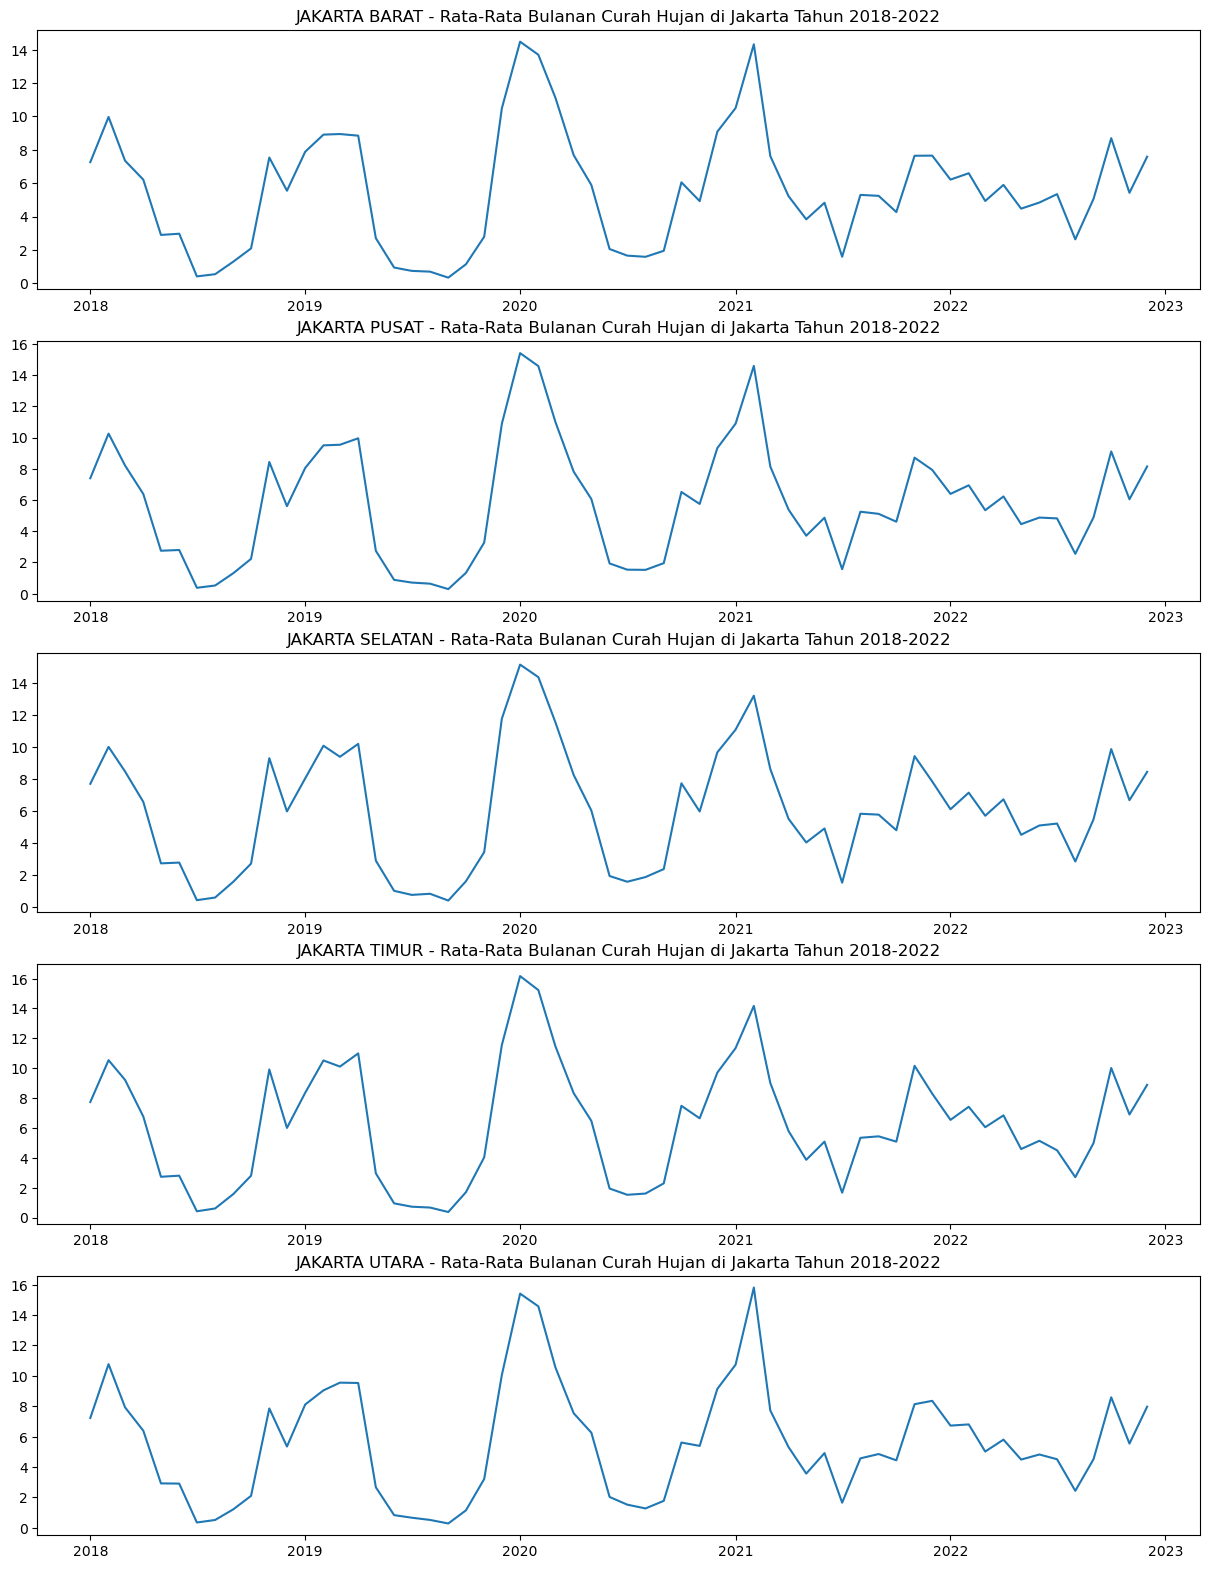

In [47]:
fig  = plt.figure(figsize=(15,60))
cities = list(dissolved_result_df['KABKOT'].unique())
dissolved_result_df = dissolved_result_df.set_index('time')

# Iterate through each month and plot the data
for city, ax in zip(cities, range(1,6)):
    # Filter data for the current wilayah admin
    data_city = dissolved_result_df[dissolved_result_df['KABKOT'] == city]

    # Plot the map for the current kabkot
    fig.add_subplot(15, 1, ax)
    plt.plot(data_city['tp'])
    plt.title(f'{city} - Rata-Rata Bulanan Curah Hujan di Jakarta Tahun 2018-2022')
    #ax.set_title(f'{city}')

Analisis Univariat

In [48]:
mean_tp_month_year = dissolved_result.groupby(['year', 'month'], as_index=False)['tp'].mean()

mean_tp_month_year['tp'] = mean_tp_month_year['tp'].round(2)

mean_tp_month_year

,year,month,tp
0,2018,1,7.47
1,2018,2,10.31
2,2018,3,8.24
3,2018,4,6.47
4,2018,5,2.81
5,2018,6,2.86
6,2018,7,0.40
7,2018,8,0.56
8,2018,9,1.40
9,2018,10,2.39


In [49]:
#mean_tp_month_year.to_excel("/Users/Jia/Downloads/data_skripsi/curah_hujan/tp_year_mean.xlsx")

In [50]:
# mean per tahun
tp_year_mean = dissolved_result.groupby(['year'], as_index=False)['tp'].mean()

tp_year_mean['tp'] = tp_year_mean['tp'].round(2)

tp_year_mean

,year,tp
0,2018,4.77
1,2019,4.86
2,2020,7.00
3,2021,6.78
4,2022,5.89


In [51]:
#nilai mean
tp_mean_5years = mean_tp_month_year ['tp'].mean()
tp_mean_5years

5.859833333333333

In [52]:
#nilai min
tp_min_5years = mean_tp_month_year ['tp'].min()
tp_min_5years

0.34

In [53]:
#nilai max
tp_max_5years = mean_tp_month_year ['tp'].max()
tp_max_5years

15.33

In [54]:
monthly_total = dissolved_result_df.groupby(['KABKOT', 'month'], as_index=False)['tp'].mean()

monthly_total['tp'] = monthly_total['tp'].round(2)
monthly_total

,KABKOT,month,tp
0,JAKARTA BARAT,1,9.26
1,JAKARTA BARAT,2,10.70
2,JAKARTA BARAT,3,7.99
3,JAKARTA BARAT,4,6.77
4,JAKARTA BARAT,5,3.96
5,JAKARTA BARAT,6,3.12
6,JAKARTA BARAT,7,1.95
7,JAKARTA BARAT,8,2.15
8,JAKARTA BARAT,9,2.78
9,JAKARTA BARAT,10,4.45


In [55]:
# Nilai minimum
min_row = monthly_total.loc[monthly_total['tp'].idxmin()]
min_location = min_row['KABKOT']
min_month = min_row['month']
min_value = min_row['tp']

# Nilai maksimum
max_row = monthly_total.loc[monthly_total['tp'].idxmax()]
max_location = max_row['KABKOT']
max_month = max_row['month']
max_value = max_row['tp']

# Menampilkan hasil
print(f"TP min = {min_value}, {min_location}, {min_month}.")
print(f"TP max = {max_value},{max_location}, {max_month}.")

TP min = 1.74, JAKARTA UTARA, 7.
TP max = 11.57,JAKARTA TIMUR, 2.


In [56]:
#mean kabkot 5 years

mean_kabkot = dissolved_result_df.groupby(['KABKOT'], as_index=False)['tp'].mean()

mean_kabkot['tp'] = mean_kabkot['tp'].round(2)

mean_kabkot_sorted = mean_kabkot.sort_values(by='tp', ascending=False)
print(mean_kabkot_sorted)

            KABKOT    tp
3    JAKARTA TIMUR  6.21
2  JAKARTA SELATAN  6.06
1    JAKARTA PUSAT  5.80
4    JAKARTA UTARA  5.66
0    JAKARTA BARAT  5.57
